### Fitting Classification Trees

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing the carseats dataset

car_data = pd.read_csv('Carseats.csv')
car_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
car_data.shape

(400, 11)

In [4]:
# Splitting the model into test and train data 

from sklearn.model_selection import train_test_split



(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <a list of 10 Patch objects>)

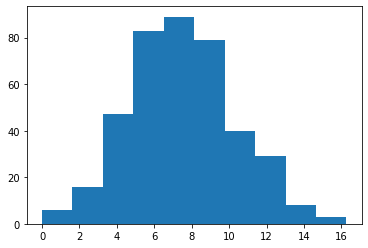

In [5]:
plt.hist(car_data['Sales'])

In [6]:
# The above histogram shows that sales is a continous variable, so we recode it as a binary variable 
# if the value of sales exceeds 8 then we change it to yes, otherwise no and store the values in other 
# variable called "High"

def boolean_implication(x):
    
    if x >= 8.0:
        return "Yes"
    
    else:
        return "No"

In [7]:
car_data['High'] = car_data['Sales'].apply(lambda x : boolean_implication(x))

In [8]:
car_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,No


In [9]:
# Dividing our Tree dataset into the predictors and response variables (seperate dataframes)
# We want to predict the values of high based on all the predictors except the sales.

y = car_data['High']
X = car_data.copy()
X.drop(columns = ['Sales', 'High'], inplace=True)

In [10]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:
y.head()

0    Yes
1    Yes
2    Yes
3     No
4     No
Name: High, dtype: object

In [12]:
# Encoding the categorical data in our predictors(X) dataset

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['ShelveLoc'] = le.fit_transform(X['ShelveLoc'])
X['Urban'] = le.fit_transform(X['Urban'])
X['US'] = le.fit_transform(X["US"])

In [13]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [14]:
# Using the scikit-learn library to implement Decision Tree for Classification

from sklearn import tree

tree_obj = tree.DecisionTreeClassifier(max_depth=6, criterion='entropy')

In [15]:
# Fitting the data into the DeclsionTreeClassifier Object

tree_fit = tree_obj.fit(X, y)

In [16]:
# Getting the mean accuracy on the training dataset

tree_fit.score(X,y)

0.905

In [17]:
# Number of terminal nodes

tree_fit.get_n_leaves()

29

In [18]:
# Error in training classification
1 - tree_fit.score(X,y)

0.09499999999999997

In [19]:
tree_fit.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [20]:
# For Visualization of the decision tree we can use scikit learn's export_graphviz which converts the decision...
# ... tree classifier into a dot file and then we use pydotplus to convert this dot file into png ot displayable...
# ... form on jupyter

pip install graphviz

pip install pydotplus

In [21]:
from sklearn.tree import export_graphviz
import io
from IPython.display import Image
import pydotplus

In [22]:
dot_data = io.StringIO()

In [23]:
export_graphviz(tree_obj, out_file=dot_data, filled=True, rounded=True, special_characters=True, 
               feature_names= X.columns, class_names=['Yes', 'No'])

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [25]:
graph.write_png('carseats.png')

True

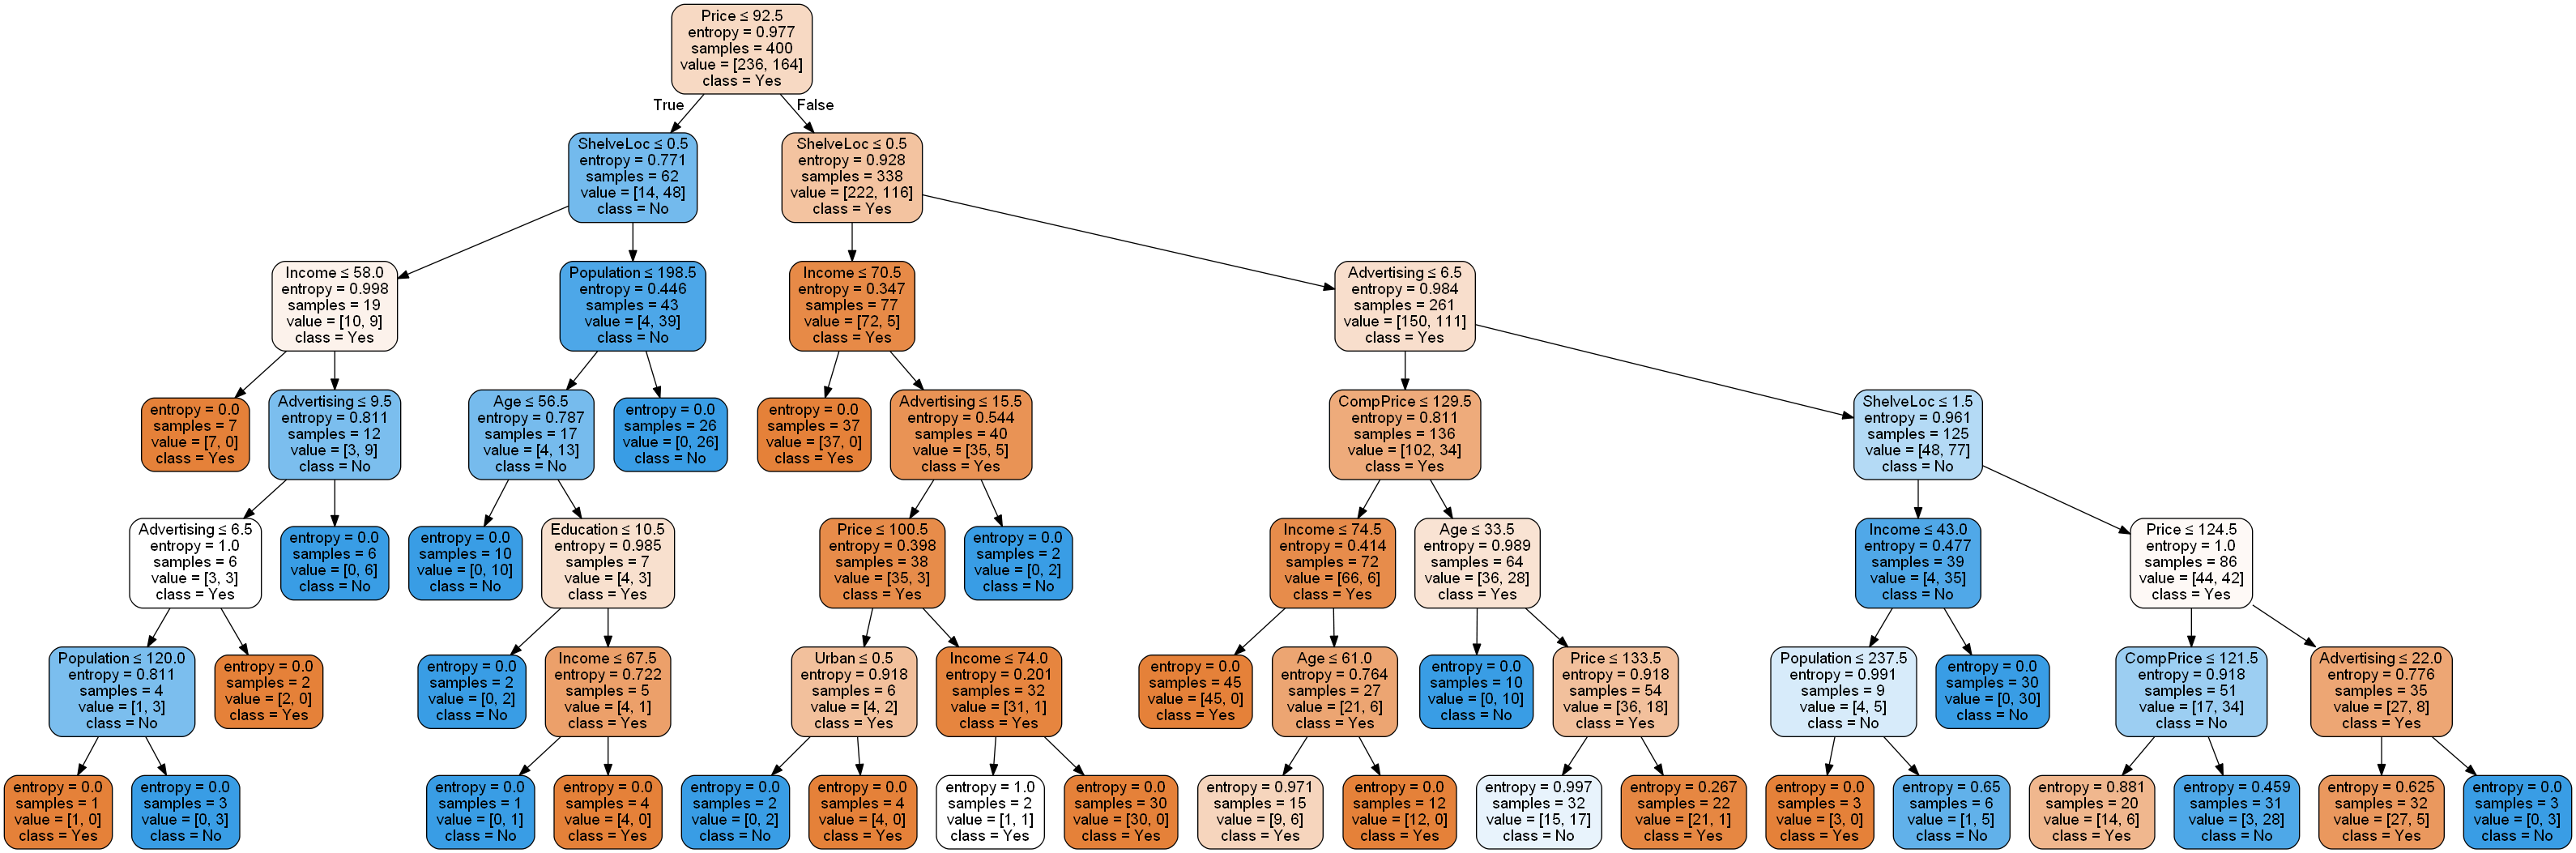

In [26]:
Image(graph.create_png())

In [27]:
# As we can see that shelving location is an important feature which distinguishes between good, bad and medium
# Now instead of calculating the training error accuracy we will calculate the test error accuracy by...
# ... dividing the data into train and test.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [29]:
print(X_train.shape)
print(y_train.shape)

(320, 10)
(320,)


In [30]:
print(X_test.shape)
print(y_test.shape)

(80, 10)
(80,)


In [31]:
# Building a Decision Tree Classifier based only on the treaining data

tree_train_obj = tree.DecisionTreeClassifier(max_depth=6)

In [32]:
tree_train_fit = tree_train_obj.fit(X_train, y_train)
tree_train_fit.score(X_train, y_train)

0.925

In [33]:
y_pred = tree_train_fit.predict(X_test)

In [34]:
tree_train_fit.score(X_test, y_test)

0.7875

In [35]:
# Inorder to calculate the performance of the prediction we check the classification report and the confusion matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.79      0.84      0.82        45
         Yes       0.78      0.71      0.75        35

    accuracy                           0.79        80
   macro avg       0.79      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80



In [37]:
# In order to print confusion matrix effectively we need to print a dataframe with labeled axes

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['No', 'Yes'], columns=['No', 'Yes'])

In [38]:
confusion_matrix

,No,Yes
No,38,7
Yes,10,25


In [39]:
# Performing cross validation on our decision tree

from sklearn.model_selection import cross_val_score

In [40]:
scores = cross_val_score(tree_train_fit, X_train, y_train, cv=10)

In [41]:
scores.mean()

0.7

In [42]:
# Cost Effective Pruning using Scikit-Learn in order to effectively prune the tree

dt_obj = tree.DecisionTreeClassifier(random_state=0)

In [43]:
path = dt_obj.cost_complexity_pruning_path(X_train, y_train)

In [44]:
path 

{'ccp_alphas': array([0.        , 0.00204327, 0.00267857, 0.0028125 , 0.00284091,
        0.00286458, 0.00298913, 0.00300481, 0.00302419, 0.00388889,
        0.00401786, 0.00416667, 0.00416667, 0.005     , 0.005     ,
        0.00520833, 0.0053442 , 0.0054321 , 0.0054697 , 0.00549853,
        0.0057967 , 0.0084375 , 0.00928977, 0.01073146, 0.01112815,
        0.0112037 , 0.01260417, 0.01285714, 0.01915034, 0.01946895,
        0.02595799, 0.04883578, 0.05154865]),
 'impurities': array([0.        , 0.00612981, 0.01148695, 0.01711195, 0.02847559,
        0.03420475, 0.04018301, 0.04619263, 0.05224102, 0.06390768,
        0.06792554, 0.07209221, 0.07625887, 0.08125887, 0.08625887,
        0.10188387, 0.11257228, 0.12886858, 0.13433827, 0.14533534,
        0.15692875, 0.16536625, 0.18394579, 0.19467725, 0.2280617 ,
        0.2392654 , 0.26447374, 0.27733088, 0.29648122, 0.35488805,
        0.38084604, 0.42968182, 0.48123047])}

In [45]:
ccp_alphas = path.ccp_alphas
ccp_impurities = path.impurities

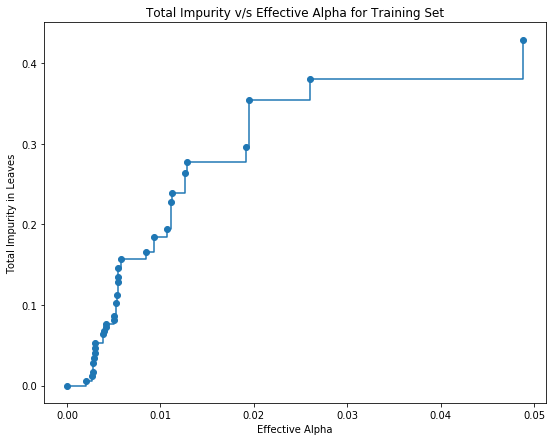

In [46]:
# We need to remove the maximum effective value of alpha as because it would account to form a tree with zero...
# ... leaf nodes which isn't of any use for us in making an effective decision tree

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(7)

ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity in Leaves")
ax.set_title("Total Impurity v/s Effective Alpha for Training Set")

ax.plot(ccp_alphas[:-1], ccp_impurities[:-1], marker = 'o', drawstyle='steps-post')

In [47]:
# Using Cross-Validation to get a best value of ccp_alpha 

from sklearn.model_selection import cross_val_score

alpha_score_dict = dict()

for alpha in ccp_alphas[:-1]:
    
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf_fit = clf.fit(X_train, y_train)
    scores = cross_val_score(clf_fit, X_train, y=y_train, cv = 10)
    
    alpha_score_dict[alpha] = scores.mean()

In [48]:
alpha_score_dict

{0.0: 0.715625,
 0.0020432692307692335: 0.715625,
 0.002678571428571429: 0.71875,
 0.0028125000000000008: 0.71875,
 0.002840909090909091: 0.71875,
 0.0028645833333333336: 0.71875,
 0.0029891304347826097: 0.71875,
 0.003004807692307694: 0.71875,
 0.003024193548387095: 0.71875,
 0.0038888888888888896: 0.728125,
 0.004017857142857142: 0.728125,
 0.004166666666666667: 0.728125,
 0.004999999999999999: 0.728125,
 0.005208333333333333: 0.73125,
 0.0053442028985507236: 0.734375,
 0.0054320987654320994: 0.734375,
 0.005469696969696972: 0.734375,
 0.005498533724340179: 0.734375,
 0.0057967032967032855: 0.721875,
 0.008437499999999999: 0.7375,
 0.009289772727272726: 0.725,
 0.010731456043956044: 0.721875,
 0.011128150369562584: 0.721875,
 0.011203703703703702: 0.721875,
 0.012604166666666666: 0.70625,
 0.012857142857142857: 0.70625,
 0.019150336813103505: 0.68125,
 0.01946894540644541: 0.68125,
 0.025957987129358095: 0.696875,
 0.04883577833990399: 0.625}

In [49]:
y_train

153     No
42     Yes
339    Yes
128     No
102     No
142     No
341     No
18     Yes
229    Yes
295     No
206     No
43      No
1      Yes
103     No
106     No
392     No
63     Yes
105     No
318    Yes
287     No
60     Yes
152     No
12      No
212    Yes
321     No
278     No
200     No
389    Yes
189    Yes
219    Yes
      ... 
136     No
30     Yes
398     No
194     No
56     Yes
201     No
149    Yes
21     Yes
183     No
0      Yes
52      No
126    Yes
294    Yes
44      No
164    Yes
395    Yes
313    Yes
311     No
94     Yes
109    Yes
359     No
252    Yes
58      No
306     No
87     Yes
360    Yes
385     No
197     No
174     No
122     No
Name: High, Length: 320, dtype: object

In [50]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.005469696969696972)
clf_fit = clf.fit(X_train, y_train)

In [51]:
y_pred = clf_fit.predict(X_test)

In [52]:
clf_fit.score(X_test, y_test)

0.7875

### Fitting Regression Trees

In [53]:
boston_data = pd.read_csv('Boston.csv', )

In [54]:
boston_data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [55]:
boston_data.drop(columns=['Unnamed: 0'], inplace=True)

In [56]:
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [57]:
# Our X data that would account for all the predictor variables will contain all the variables except for medv

X = boston_data.iloc[:,0:-1]
y = boston_data['medv']

In [58]:
# We create training data and testing data and we fit regression tree to it.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [59]:
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [60]:
# Fitting a regression decision tree

from sklearn import tree

regtree = tree.DecisionTreeRegressor(max_depth = 5)

regtree_fit = regtree.fit(X_train, y_train)

In [61]:
model_score = regtree_fit.score(X_train, y_train)
model_score

0.9276684892463734

In [62]:
# Now let us test the tree on test data, to know the real performance of the tree

y_pred = regtree_fit.predict(X_test)

In [63]:
# Now we plot the tree using graphviz and pydotplus and StringIO using io module

import io
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [64]:
dot_data_2 = io.StringIO()

In [65]:
export_graphviz(regtree, out_file= dot_data_2, filled=True, rounded=True, feature_names=X_train.columns,
               special_characters=True)

In [66]:
graph_2 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())

In [67]:
graph_2.write_png('boston_tree.png')

True

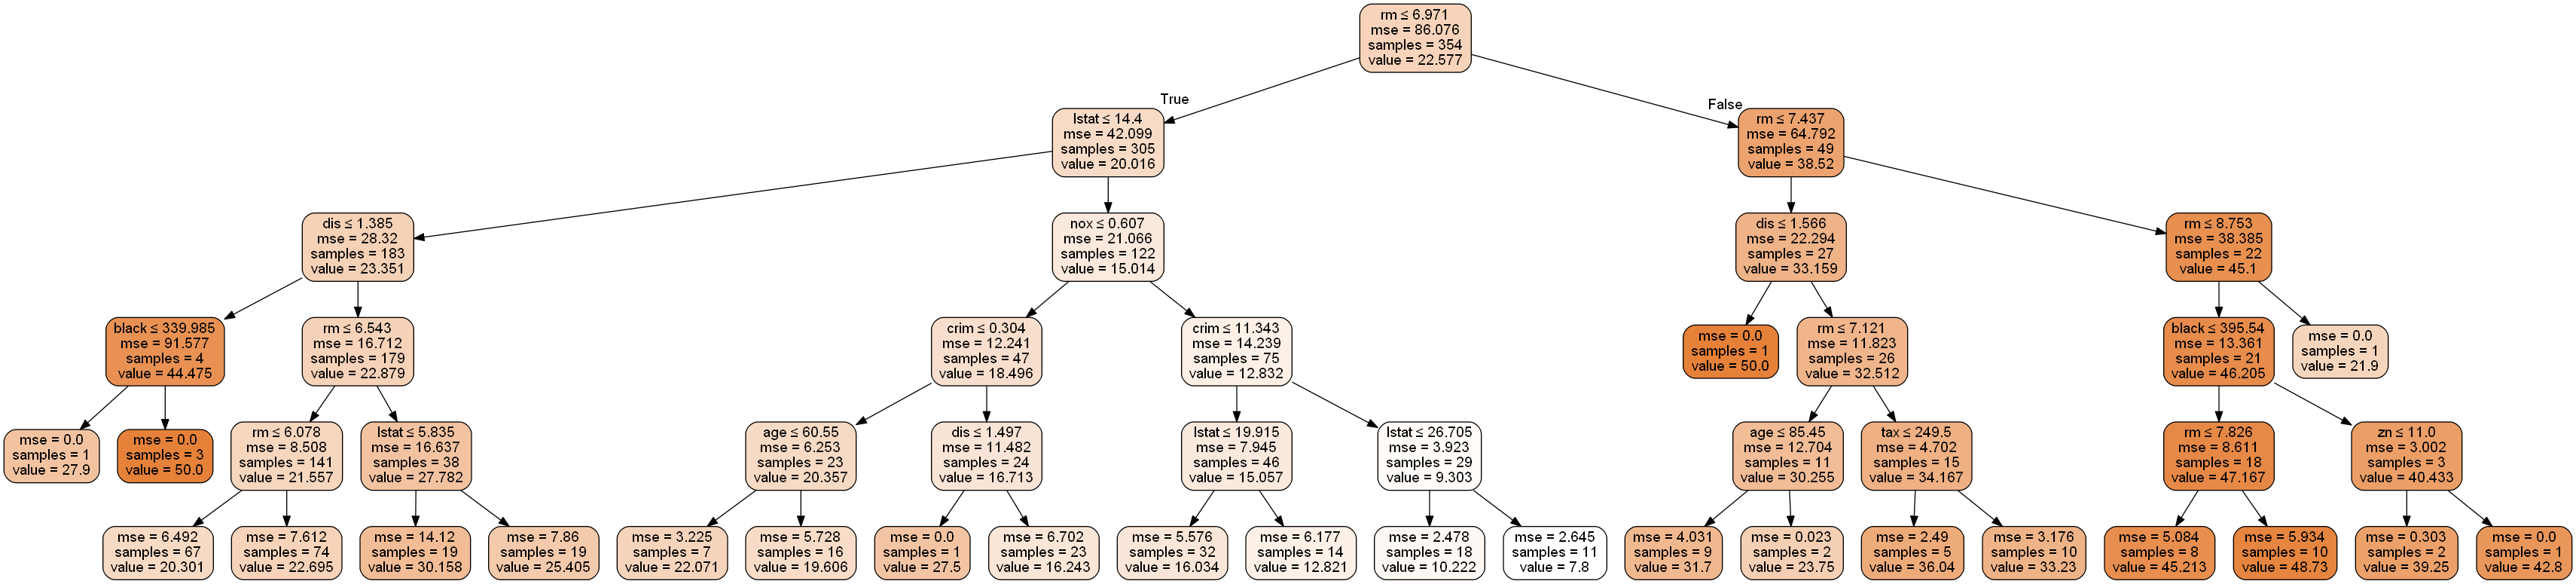

In [68]:
Image(graph_2.create_png())

In [69]:
# In case of regression unlike classification we will use mean square deviation to deal with the error analysis
# For this we will calculate the mean_squared_error and r2_score and also analyse the plots between residuals...
# ... and fitted values and True v/s predicted values

from sklearn.metrics import mean_squared_error, r2_score

In [70]:
mean_squared_error(y_test, y_pred)

19.94354433796301

In [71]:
r2_score(y_test, y_pred)

0.7523976310077606

In [173]:
# Evaluating the model 

from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, random_state=1)

In [174]:
scores = cross_val_score(regtree, X=X_train, y=y_train, cv=cv)

In [175]:
scores.mean()

0.7215196133548055

In [72]:
# Just For Fun

from sklearn.model_selection import cross_val_predict

y_cv_predict = cross_val_predict(regtree, X_train, y_train)

print(mean_squared_error(y_train, y_cv_predict))
print(r2_score(y_train, y_cv_predict))

26.760713978244354
0.6891031958334757


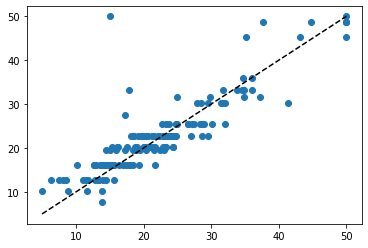

In [73]:
# Plotting a plot between actual and predicted data

fig, ax = plt.subplots()

ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')

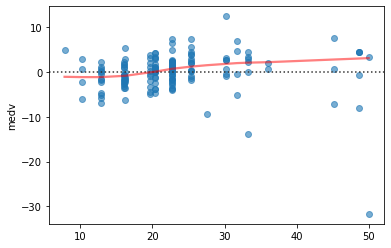

In [74]:
# Plotting residual with prediction plot

fig1 = plt.figure()
residuals = y_test - y_pred

import seaborn as sns

fig1.axes[0] = sns.residplot(y_pred, y_test, lowess=True, line_kws={'color':'r', 'alpha':0.5},
                            scatter_kws={'alpha': 0.6})

In [75]:
# Applying cost-complexity pruning on regression decision trees

path_reg = regtree.cost_complexity_pruning_path(X_train, y_train)

In [76]:
reg_ccp_alphas = path_reg.ccp_alphas
reg_ccp_alphas

array([0.00000000e+00, 2.37335217e-02, 7.43512241e-02, 8.35956526e-02,
       1.13159729e-01, 1.55339689e-01, 2.83260177e-01, 2.84003629e-01,
       3.29330105e-01, 3.43021831e-01, 4.40554738e-01, 5.68861560e-01,
       6.06161909e-01, 8.31973578e-01, 1.03476695e+00, 1.59285445e+00,
       1.66299577e+00, 2.61820328e+00, 3.27569928e+00, 4.88258307e+00,
       5.15483205e+00, 1.43719423e+01, 4.08353908e+01])

In [77]:
reg_impurities = path_reg.impurities
reg_impurities

array([ 6.22599797,  6.24973149,  6.32408271,  6.40767837,  6.5208381 ,
        6.67617778,  7.24269814,  7.52670177,  7.85603187,  8.1990537 ,
        8.63960844,  9.20847   ,  9.81463191, 10.64660549, 11.68137244,
       13.27422689, 14.93722266, 17.55542594, 20.83112522, 25.71370829,
       30.86854034, 45.24048269, 86.07587347])

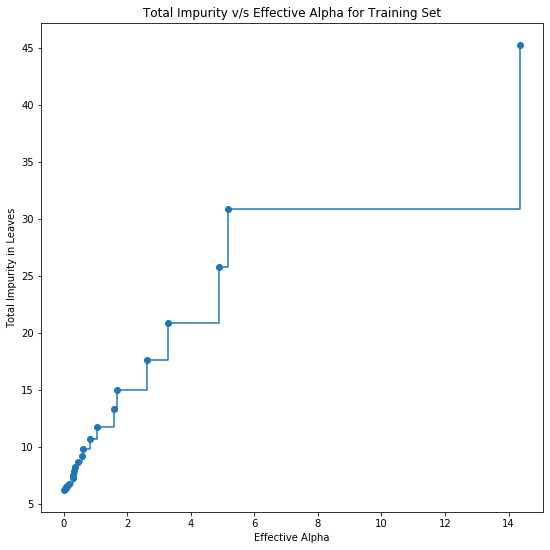

In [78]:
# Plotting impurites vs alpha plot

fig, ax = plt.subplots()

fig.set_figwidth(9)
fig.set_figheight(9)

ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity in Leaves")
ax.set_title("Total Impurity v/s Effective Alpha for Training Set")

ax.plot(reg_ccp_alphas[0:-1], reg_impurities[0:-1], marker='o', drawstyle='steps-post')

In [79]:
from sklearn.model_selection import cross_val_score

reg_alpha_score_dict = dict()

for alpha in reg_ccp_alphas[:-1]:
    
    clf = tree.DecisionTreeRegressor(random_state=4, ccp_alpha=alpha)
    clf_fit = clf.fit(X_train, y_train)
    scores = cross_val_score(clf_fit, X_train, y=y_train, cv = 5)
    
    reg_alpha_score_dict[alpha] = scores.mean()

In [80]:
reg_alpha_score_dict

{0.0: 0.697738498690965,
 0.023733521657261322: 0.7033177490755402,
 0.07435122410550571: 0.7057809397492828,
 0.0835956526125537: 0.710260242300534,
 0.11315972898673995: 0.7115962704944447,
 0.15533968926552083: 0.7084965053439561,
 0.28326017673474746: 0.7393387269487323,
 0.2840036286714567: 0.7393387269487323,
 0.3293301049232649: 0.7279962948606445,
 0.3430218312453572: 0.7266447442452106,
 0.4405547378447474: 0.7264693808376028,
 0.568861560076249: 0.7173823383729401,
 0.6061619090099748: 0.7189778156308153,
 0.8319735783153199: 0.716182329948001,
 1.0347669491525409: 0.7004954260312549,
 1.592854452515468: 0.6634701156823783,
 1.6629957665234878: 0.6634701156823783,
 2.618203284009157: 0.6176117904030407,
 3.275699275408722: 0.6070205053090613,
 4.882583069637834: 0.5776454838921263,
 5.154832054915168: 0.5673176789256712,
 14.371942345095558: 0.4518102767538082}

In [87]:
our_alpha = 0.2840036286714567

In [113]:
regtree_pruning = tree.DecisionTreeRegressor(ccp_alpha=our_alpha, max_depth=6)

In [114]:
regtree_prun_fit = regtree_pruning.fit(X_train, y_train)

In [115]:
y_pred_prun = regtree_prun_fit.predict(X_test)

In [116]:
mean_squared_error(y_test, y_pred_prun)

32.23733072076275

In [117]:
r2_score(y_test, y_pred_prun)

0.5997682597845384

In [148]:
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, random_state=1)

In [149]:
scores = cross_val_score(regtree_pruning, X=X_train, y=y_train, cv=cv)

In [150]:
scores.mean()

0.7806078452449

### Bagging and Random Forests

#### Bagging

In [119]:
boston_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [125]:
X = boston_data.iloc[:,:-1]
y = boston_data['medv']

In [128]:
len(X.columns)

13

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [152]:
from sklearn.ensemble import BaggingRegressor

In [163]:
reg_obj = tree.DecisionTreeRegressor(max_depth=5)
reg_obj_fit = reg_obj.fit(X_train, y_train)

In [164]:
regr_bagging = BaggingRegressor(base_estimator=reg_obj_fit, max_samples=200, max_features=12, random_state=1)

In [179]:
regr_bagging_fit = regr_bagging.fit(X_train, y_train)

In [166]:
y_pred_bagging = regr_bagging.predict(X_test)

In [167]:
mean_squared_error(y_test, y_pred_bagging)

23.80781064855391

In [168]:
r2_score(y_test, y_pred_bagging)

0.7690952972992506

In [169]:
# Evaluating the model 

from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, random_state=1)

In [170]:
from sklearn.model_selection import cross_val_score

In [171]:
scores = cross_val_score(regr_bagging, X=X_train, y=y_train, cv=cv)

In [172]:
scores.mean()

0.8248650658456295

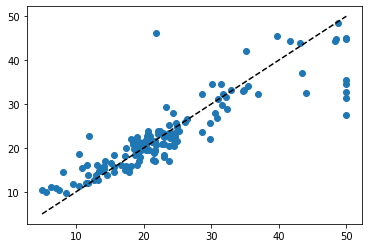

In [178]:
# Plotting a plot between actual and predicted data

fig, ax = plt.subplots()

ax.scatter(y_test, y_pred_bagging)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--k")

    As we can observe that, at first the simple regression tree gave us the accuracy of only 0.72 then we did 
    pruning and we got an accuracy of around 0.78 then further we did bagging and we got an accuracy of 0.82.
    Now, moving on further we explore the concepts of Random Forests and Boosting.

#### Random Forests

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [234]:
# Without using the value of ccp_alpha, also i've used the max_features as ceil of under root of total features.

reg_forest = RandomForestRegressor(n_estimators=300, max_depth=5, max_features=6, random_state=5)

In [235]:
reg_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=300,
                      random_state=5)

In [236]:
reg_forest.feature_importances_ * 100

array([ 3.46479019,  0.10442884,  5.19481   ,  0.04623464,  3.89902219,
       35.64846879,  1.94903621,  4.54626373,  0.39430876,  2.31703511,
        6.40985749,  0.99646978, 35.02927426])

In [237]:
reg_forest.score(X_train, y_train)

0.9367495369696207

In [238]:
y_pred_forest = reg_forest.predict(X_test)

In [239]:
mean_squared_error(y_test, y_pred_forest)

17.097665510481814

In [240]:
r2_score(y_test, y_pred_forest)

0.8341749508237769

In [241]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [242]:
cv = RepeatedKFold(n_splits=6, random_state=4)

In [243]:
scores = cross_val_score(reg_forest, X = X_train, y = y_train, cv= cv)

In [244]:
scores.mean()

0.8414448163981658